# Inspecting directional data in a MagIC contribution using PmagPy

This template notebook enables inspection of the data within a MagIC contribution. We want to get the data from MagIC, import the data into our notebook, and inspect the data by making plots.

## Import functions from PmagPy

To start with, let's import some functions from PmagPy:

In [1]:
import pmagpy.ipmag as ipmag

%matplotlib inline
%config InlineBackend.figure_format='retina'

## Import the data

We can use ipmag to go download the data from MagIC for us. We can do this in a couple of ways. One way is to use the doi and the function ```ipmag.download_magic_from_doi()```. The other is to use the MagIC contribution ID number with the ```ipmag.download_magic_from_id()``` function. Let's take that approach for the study:

> Nicholas L. Swanson‐Hysell, Margaret S. Avery, Yiming Zhang, Eben B. Hodgin, Robert J. Sherwood, Francisco E. Apen, Terrence J. Boerboom, C. Brenhin Keller, John M. Cottle (2021). The paleogeography of Laurentia in its early years:new constraints from the Paleoproterozoic East‐Central Minnesota batholith. Tectonics. doi:10.1029/2021TC006751. MagIC contribution: https://earthref.org/MagIC/doi/10.1029/2021TC006751

which has a MagIC ID of 17072. This MagIC ID can be replaced with that of another study in the MagIC database.

In [2]:
magic_id='17072'
result, magic_file_name = ipmag.download_magic_from_id(magic_id)

Running this function will download a file called ```magic_contribution_17072.txt``` in the folder that this notebook is in.

In the above code cell, we saved a variable `magic_file_name` that is the name of the files that was downloaded.

In [3]:
magic_file_name

'magic_contribution_17072 (1).txt'

## Unpacking the tables

A MagIC contribution is a single .txt file that comprises a number of tables. In the case of this contribution, we have these tables:
- contribution
- locations
- sites
- samples
- specimens
- measurements

We want unpack the contribution into these distinct tables.

In [4]:
ipmag.download_magic(magic_file_name,print_progress=False)

1  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/contribution.txt
1  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/locations.txt
90  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/sites.txt
312  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/samples.txt
1559  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/specimens.txt
12410  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/measurements.txt


True

## Visualizing measurement level data

The ```ipmag.zeq_magic()``` function will plot measurement data from single specimens generating:
- equal area plot
- Zijderveld plot
- demagnetization plot

The `n_plots` parameter specifies how many specimens data are generated.

-I- Using online data model
-I- Getting method codes from earthref.org
-I- Importing controlled vocabularies from https://earthref.org


AttributeError: module 'pmagpy.pmagplotlib' has no attribute 'add_borders'

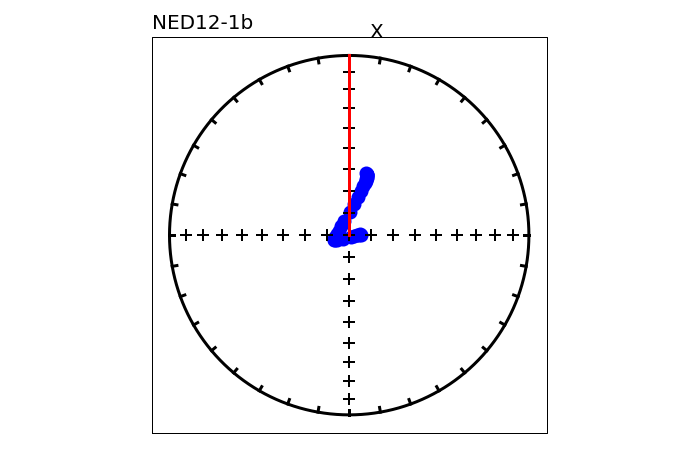

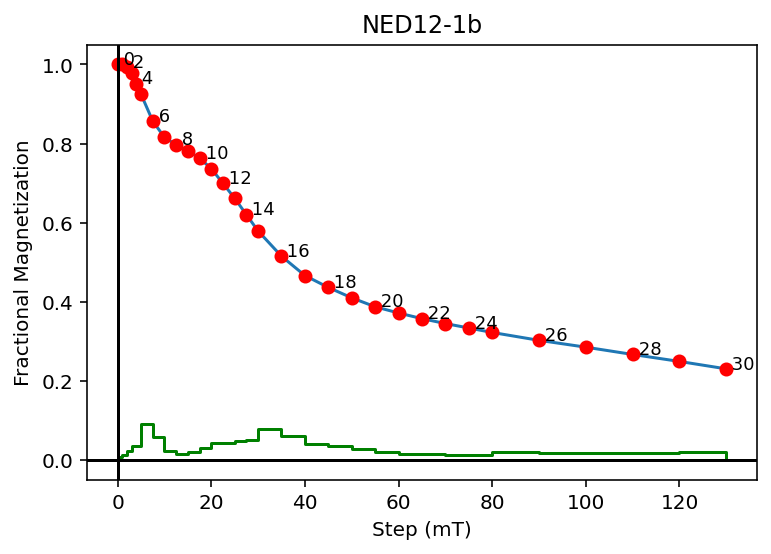

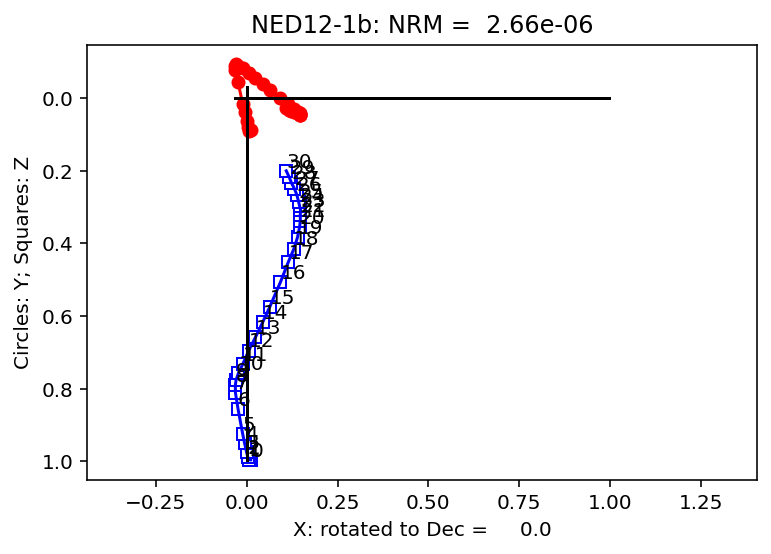

In [5]:
ipmag.zeq_magic(save_plots=False, n_plots=1)

## Visualizing site level data

Plots can also be saved by setting `save_plots` to be `True`

-W- File /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/criteria.txt is incomplete and will be ignored
90  sites records read in


AttributeError: module 'pmagpy.pmagplotlib' has no attribute 'add_borders'

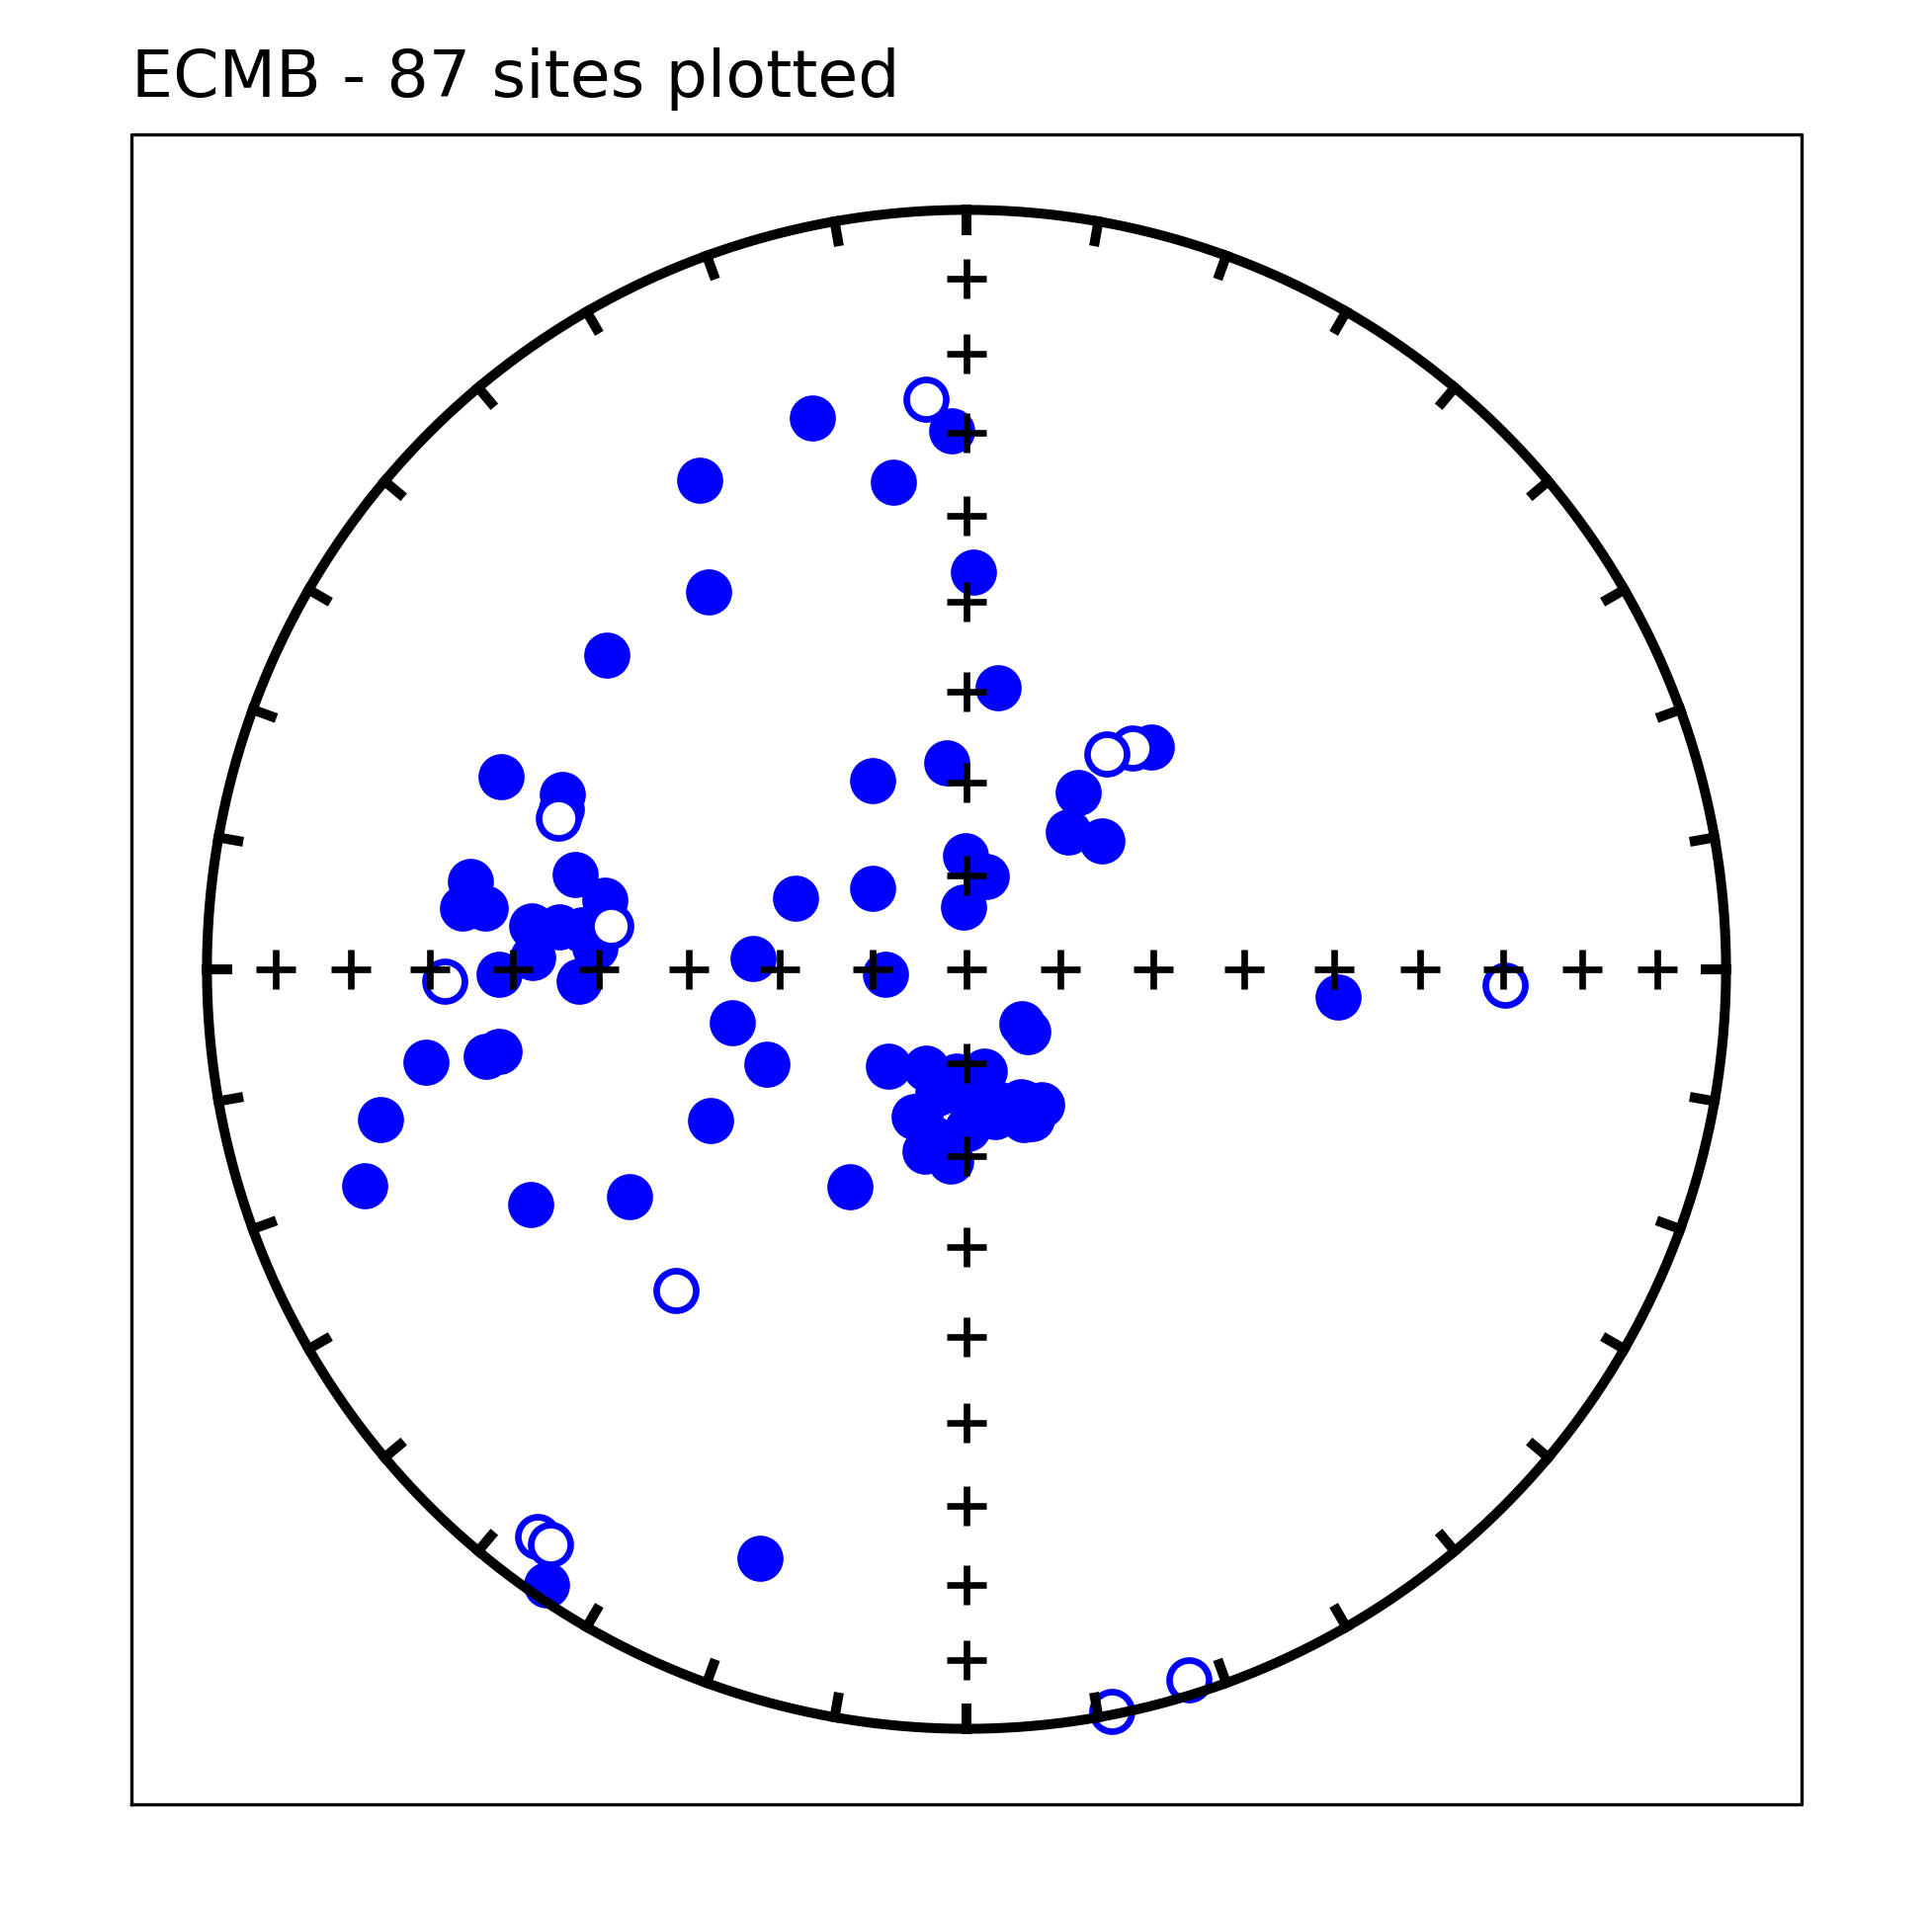

In [6]:
ipmag.eqarea_magic(save_plots=True)

In [7]:
ipmag.vgpmap_magic(flip=True,
                   save_plots=False,
                   lat_0=60)

-W- File /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/criteria.txt is incomplete and will be ignored


AttributeError: module 'pmagpy.pmagplotlib' has no attribute 'plot_map'

<Figure size 1440x1440 with 0 Axes>

## Importing specific MagIC tables

The functions above `ipmag.zeq_magic`, `ipmag.eqarea_magic`, and `ipmag.vgpmap_magic` are convenience functions that are able to directly read from MagIC files. For some other functions in `PmagPy` data need to be imported to be Python objects. There is a really nice package for dealing with tabular data in Python called `pandas`. The code cell below imports this package so that we can use it. We use the typical scientific Python nomenclature of importing it for use to the shorthand `pd`.

### Import the sites table

We can now use pandas to import the sites table to a pandas dataframe using the function `pd.read_csv()`.

In [ ]:
sites = pd.read_csv('sites.txt',sep='\t',header=1)
sites

We can extract specific columns from the dataframe by using the nomenclature `dataframe_name['column_name']`. In this case, the dataframe name is `sites` and the column name might be `dir_dec`. So `sites['dir_dec']` will give us  all the declinations.

In [ ]:
sites_dec = sites['dir_dec']
sites_inc = sites['dir_inc']

## Plot up data from any specimen

In [8]:
import pandas as pd

# Read the files
specimens = pd.read_csv('specimens.txt', sep='\t', skiprows=1)
measurements = pd.read_csv('measurements.txt', sep='\t', skiprows=1)

# Get the unique specimen names from each DataFrame
unique_specimens = specimens['specimen'].unique()
unique_measurements = measurements['specimen'].unique()

# Find the common unique names using numpy's intersect1d method
specimen_list = pd.np.intersect1d(unique_specimens, unique_measurements)

specimen_list

array(['NED1-1b', 'NED1-2b', 'NED1-3b', 'NED1-4b', 'NED1-5b', 'NED1-6b',
       'NED1-7b', 'NED1-8b', 'NED10-1b', 'NED10-2b', 'NED10-3b',
       'NED10-4b', 'NED10-5b', 'NED10-6b', 'NED10-7b', 'NED10-8b',
       'NED11-1b', 'NED11-2b', 'NED11-3b', 'NED11-4b', 'NED11-5b',
       'NED11-6b', 'NED11-7b', 'NED11-8b', 'NED12-1b', 'NED12-2b',
       'NED12-3b', 'NED12-4b', 'NED12-5b', 'NED12-6b', 'NED12-7b',
       'NED12-8b', 'NED13-1b', 'NED13-2b', 'NED13-3b', 'NED13-4b',
       'NED13-5b', 'NED13-6b', 'NED13-7b', 'NED13-8b', 'NED14-1b',
       'NED14-2b', 'NED14-3b', 'NED14-4b', 'NED14-5b', 'NED14-6b',
       'NED14-7b', 'NED14-8b', 'NED14-9b', 'NED15-1b', 'NED15-2b',
       'NED15-3b', 'NED15-4b', 'NED15-5b', 'NED15-6b', 'NED15-7b',
       'NED15-8b', 'NED15-9b', 'NED16-1b', 'NED16-2b', 'NED16-3b',
       'NED16-4b', 'NED16-5b', 'NED16-6b', 'NED16-7b', 'NED16-8b',
       'NED17-10a', 'NED17-10b', 'NED17-11a', 'NED17-11b', 'NED17-1a',
       'NED17-1b', 'NED17-2a', 'NED17-2b', 'NED17-3a',

In [ ]:
specimen_name = 'NED17-4b'

AttributeError: module 'pmagpy.pmagplotlib' has no attribute 'add_borders'

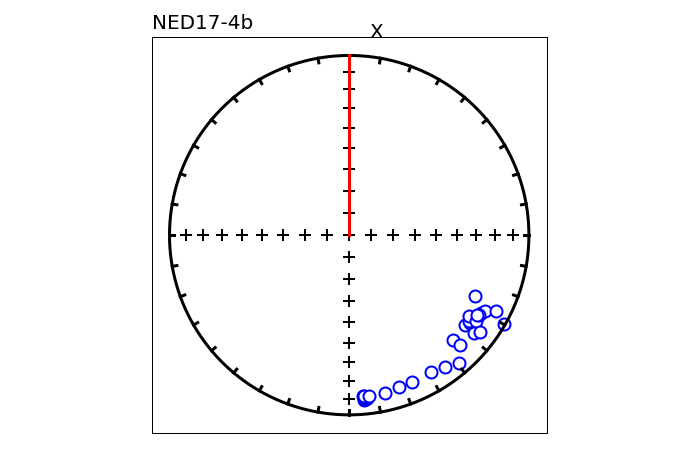

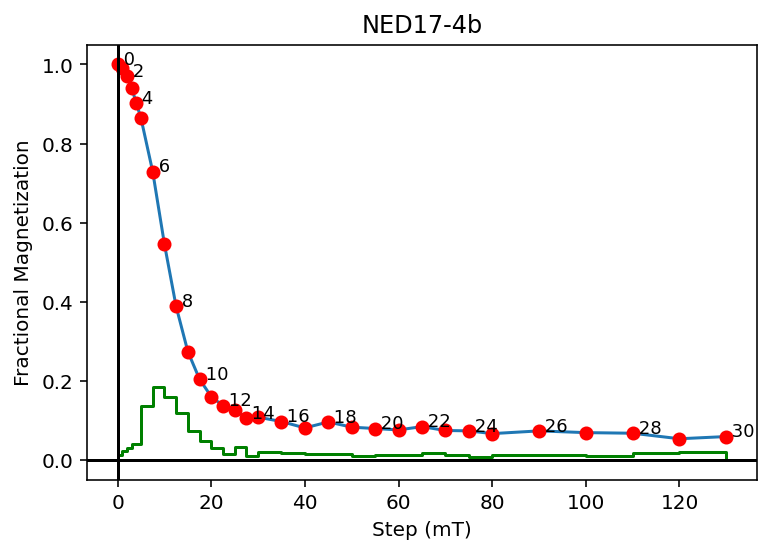

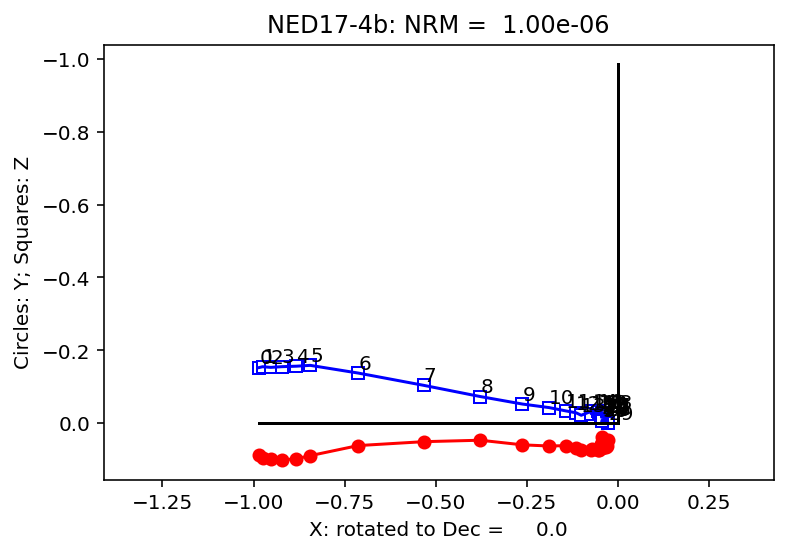

In [9]:
ipmag.zeq_magic(save_plots=False, specimen='NED17-4b')

## Pick a MagIC contribution to inspect yourself

Browse through some MagIC contributions and import the data to inspect them for yourself.

You can copy code from cells above and put them in the cells below.